<u><b>line_search argorithm :

In [22]:


import numpy as np
from scipy.optimize import line_search
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def plot_graph(xl,xu,x1,x2,fi):
    #clear_output(wait=True)
    
    #plot function graph
    plt.plot(x,y)
    #plt.plot([xl,xu],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,fi(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,f(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,fi(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,f(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,fi(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,fi(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,fi(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,fi(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    #plt.ylim([-1.2,1.2])
    plt.show()
 

    

In [23]:
def optimize_line_search(xl,xu,point,direct,mode,et,f,grad):
    it=0
    e=1

    while e>=et:
        result = line_search(f, grad, point, direct)
        #summarize the result
        alpha = result[0]
        if alpha is None:
            raise ValueError('It seems Alpha did not converge')
        # define objective function minima
        end = point + alpha * direct
        print(point,end)
        plot_graph(xl,xu,point,end,f)
        plt.show()
        it+=1
        e=abs(point-end)
        print('a: %.3f Feval: %3d It: %3d Err: %.3f x: %.1f y: %.1f g: %.1f' % (alpha,result[1],it,e,end,f(end),grad(end)))
        point=end
        time.sleep(1)
  

In [24]:
def f(x):
    return ((x**4)-16*(x**3)+45*(x**2)+20*x+203)
def gradf(x):
    return(4*(x**3)-48*(x**2)+90*x+20)

In [25]:
def g(x) :
    return ((x**5)-2*(x**4)-23*(x**3)-12*(x**2)+36*x)
def gradg(x):
    return (5*(x**4)-8*(x**3)-69*(x**2)-24*x+36)


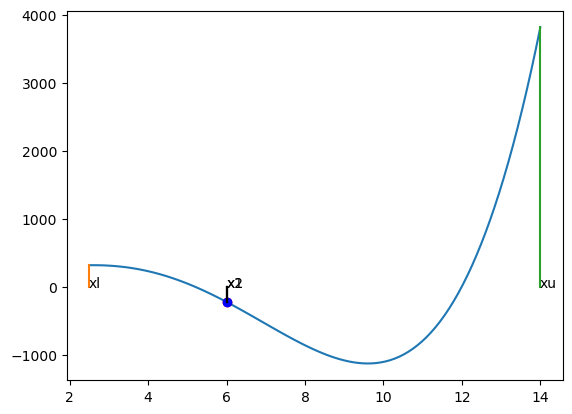

8 9.741253268328245


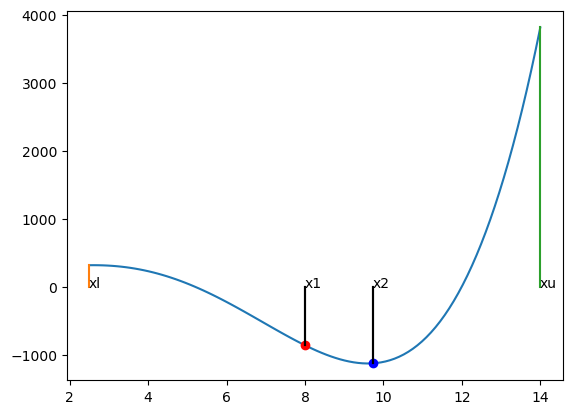

a: 0.193 Feval:   4 It:   1 Err: 1.741 x: 9.7 y: -1117.4 g: 39.4


ValueError: It seems Alpha did not converge

In [26]:
x=np.linspace(2.5,14,100)
y=f(x)
plot_graph(2.5,14,6,6,f)
optimize_line_search(2.5,14,8,9,"min",0.05,f,gradf)

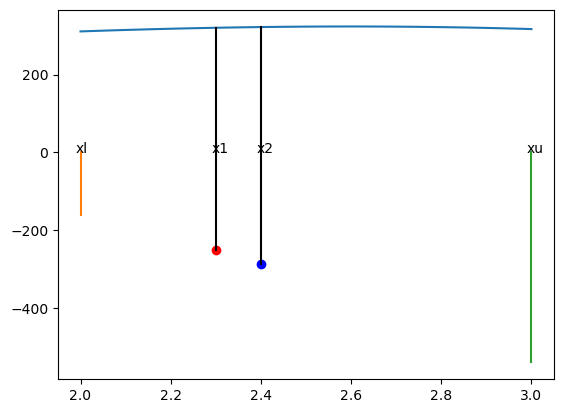

3 4.0


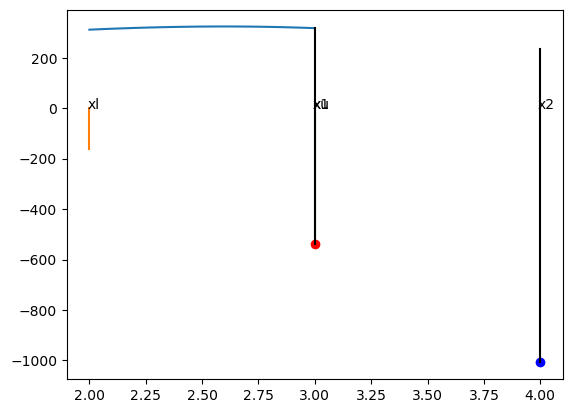

a: 1.000 Feval:   2 It:   1 Err: 1.000 x: 4.0 y: -1008.0 g: -396.0
4.0 5.0


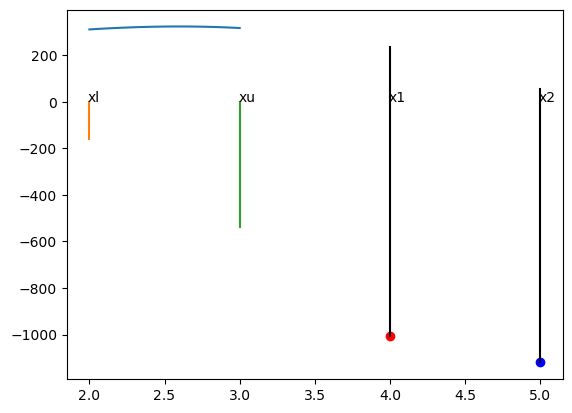

a: 1.000 Feval:   2 It:   2 Err: 1.000 x: 5.0 y: -1120.0 g: 316.0


ValueError: It seems Alpha did not converge

In [27]:
x=np.linspace(2,3,100)
y=f(x)
plot_graph(2,3,2.3,2.4,g)
optimize_line_search(2,3,3,1,"min",0.05,g,gradg)

<u><b>golden search algorithm :

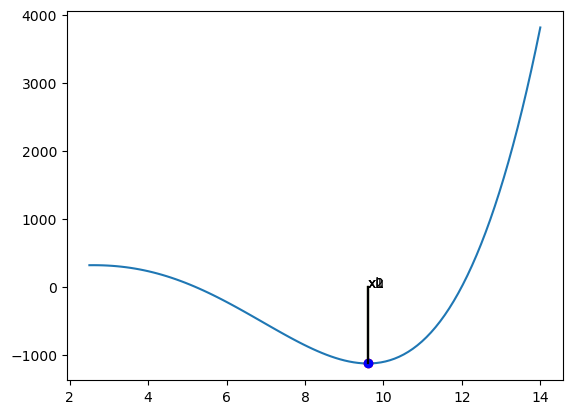

Iteration:  15
Error: 0.03353112274563623 xopt 9.604170484429957


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
def check_pos(x1,x2):
    if x2<x1:
        label='right'
    else:
        label=''
    return label
def update_interior(xl,xu):
    d=((np.sqrt(5)-1)/2)*(xu-xl)
    x1=xl+d
    x2=xu-d
    return x1,x2

def find_max(xl,xu,x1,x2,label,func_fx):
    fx1=func_fx(x1)
    fx2=func_fx(x2)
    if fx2>fx1 and label=='right':
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    else:
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    return xl,xu,xopt
def find_min(xl,xu,x1,x2,label,func_fx):
    fx1=func_fx(x1)
    fx2=func_fx(x2)
    if fx2>fx1 and label=='right':
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    else:
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    return xl,xu,xopt
def plot_graph(xl,xu,x1,x2,func_fx):
    clear_output(wait=True)
    
    #plot sinus graph
    y=func_fx(x)
    plt.plot(x,y)
   # plt.plot([0,6],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,func_fx(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func_fx(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,func_fx(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,func_fx(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,func_fx(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,func_fx(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,func_fx(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,func_fx(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    #plt.ylim([-1.2,1.2])
    plt.show()
def golden_search(xl,xu,mode,et,func_fx):
    it=0
    e=1
    while e>=et:
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        fx1=func_fx(x1)
        fx2=func_fx(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2,func_fx) #PLOTTING
        plt.show()
        
        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label,func_fx)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label,func_fx)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e,'xopt',xopt)
        time.sleep(1)
x=np.linspace(2.5,14,100)
y=f(x)

#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(2.5,14,'min',0.05,f)

In [ ]:
golden_search(2.5,14,'max',0.05,f)

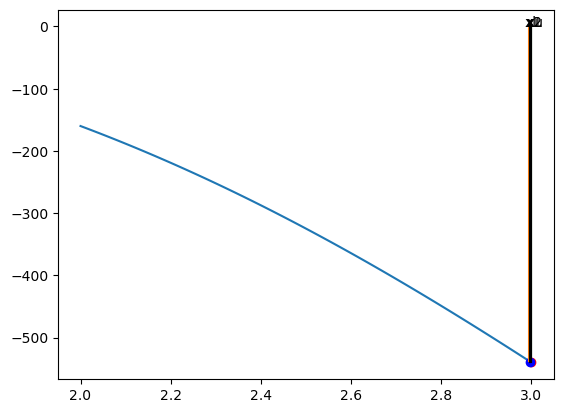

Iteration:  12
Error: 0.039557017710644224 xopt 2.998813758710358


In [37]:
#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(2,3,'min',0.05,g)

In [ ]:
#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(2,3,'max',0.05,g)